# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

In [2]:
# read in the data as a pandas dataframe 

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# create two separate dataframes according to the gender 

males = df[df.gender == 'M']
females = df[df.gender == 'F']

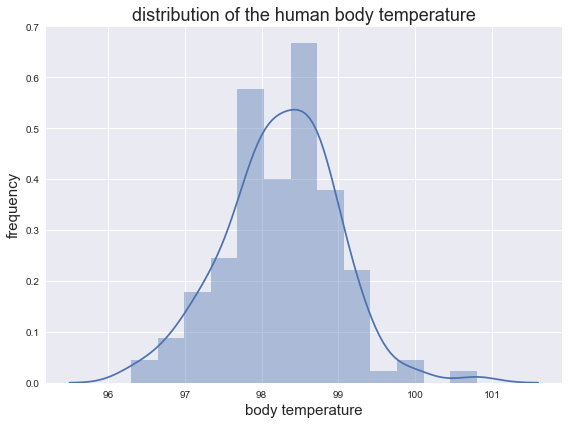

In [4]:
# visualize the distibution of human body temperature 

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df.temperature)
ax.set_xlabel('body temperature', fontsize=15)
ax.set_ylabel('frequency', fontsize=15)
ax.set_title('distribution of the human body temperature', fontsize=18)
fig.tight_layout()
None

<div class="alert alert-info">

The data is roughly normally distributed. It is also possible that the distribution is a bimodal distribution, but the peaks are too close. This indeterminacy is not a problem, since CLT applies anyway. The sample size is large: $130 >> 30$. The observations are independent, but there may be confounding factors introduced by sampling bias - no information is provided regarding how the samples were chosen. 

</div>

In [5]:
# 95% confidence interval for the mean temperature: 
# using both the t statistic and the z-statistic
# (one sample t-test)

sample_dof = len(df) - 1
sample_mean = df.temperature.mean()
sample_std = df.temperature.std()
sample_stderr = sample_std / np.sqrt(len(df))

t_crit = st.t.isf(0.025, sample_dof)
margin_of_error = t_crit*sample_stderr
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print 'mean human body temperature:', sample_mean, 'F\n'
print '95% confidence interval using the t statistic:', confidence_interval

# 95% confidence interval - using the z statistic

z_crit = st.norm.isf(0.025)
margin_of_error = z_crit*sample_stderr
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print '95% confidence interval using the z statistic:', confidence_interval
print ''

# is the true population mean really 98.6 F? 

tvalue = (sample_mean - 98.6)/sample_stderr
pvalue = st.t.sf(abs(tvalue), sample_dof)
print 'p-value that the true population mean is 98.6:', pvalue, '(using the t-test)'
zvalue = (sample_mean - 98.6)/sample_stderr
pvalue = st.norm.sf(abs(zvalue))
print 'p-value that the true population mean is 98.6:', pvalue, '(using the z-test)'
print ''

# effect size 

print 'effect size, expressed as Cohen\'s d:', (sample_mean - 98.6)/sample_std

mean human body temperature: 98.2492307692 F

95% confidence interval using the t statistic: (98.122002905608042, 98.376458632853513)
95% confidence interval using the z statistic: (98.123196428181657, 98.375265110279898)

p-value that the true population mean is 98.6: 1.20531602078e-07 (using the t-test)
p-value that the true population mean is 98.6: 2.45107850706e-08 (using the z-test)

effect size, expressed as Cohen's d: -0.478419651247


<div class="alert alert-info">

Strictly speaking, the $t$-statistic is the appropriate statistic here, but because the sample size is significantly larger than $30$, we do not expect a significant difference between the results whether we use the $t$-statistic or the $z$-statistic. The confidence interval using the $z$-statistic is slightly narrower than the confidence interval obtained using the $t$-statistic, as expected. Based on the $p$-values, it appears that it is extremely unlikely that the true population mean is $98.6$ degrees F. The effect size for the difference between the sample mean and the mean obtained by Wunderlich, expressed as Cohen's $d$, is $-0.48$. 

</div>

In [6]:
# abnormal temperatures: outside the 99% confidence intervals 
zvalue = st.norm.isf(0.005)
confidence_interval = (sample_mean - zvalue*sample_stderr, sample_mean + zvalue*sample_stderr)
print '99% confidence interval using the z statistic:', confidence_interval

99% confidence interval using the z statistic: (98.083593567992111, 98.414867970469444)


<div class="alert alert-info">

Let's declare the temperatures outside the $99\%$ confidence interval to be abnormal. Then the temperatures below $98.08$ F and the temperatures above $98.42$ F are abnormal. 

</div>

In [7]:
# independent samples t-test (two samples t-test) to figure out
# whether there is a significant difference between normal temperatures for males and females

males_dof = float(len(males) - 1)
males_mean = males.temperature.mean()
males_std = males.temperature.std()
print 'mean body temperature for males:', males_mean, 'F'

females_dof = float(len(females) - 1)
females_mean = females.temperature.mean()
females_std = females.temperature.std()
print 'mean body temperature for females:', females_mean, 'F'

stderr = np.sqrt(males_std**2 / float(len(males)) + females_std**2 / float(len(females)))
total_dof = males_dof + females_dof

pooled_variance = (males_std**2 * males_dof + females_std**2 * females_dof) / total_dof
cohen_d = (males_mean - females_mean)/ np.sqrt(pooled_variance)

tvalue = (males_mean - females_mean) / stderr

pvalue = st.t.cdf(-abs(tvalue), total_dof)

print 'effect size, expressed as Cohen\'s d =', cohen_d
print 'p-value for independent samples t-test:', pvalue

mean body temperature for males: 98.1046153846 F
mean body temperature for females: 98.3938461538 F
effect size, expressed as Cohen's d = -0.40089173786
p-value for independent samples t-test: 0.0119659415612


<div class="alert alert-info">

By the independent samples $t$-test, the normal body temperature for males is less than the normal body temperature for females. The effect size, expressed as Cohen's $d$, is $-0.4$. Since the $p$-value is less than $0.012$, we conclude that the result is statistically significant at an $\alpha$ level of $0.05$. 

</div>

<div class="alert alert-info">

<h3> Concluding Remarks: </h3>

<p> It appears extremely unlikely that the true mean temperature for the population is $98.6$ F. Further investigation is needed regarding sampling biases for the data obtained for this study as well as the data obtained by Wunderlich. If there are no sampling biases present, then it is indeed possible that the mean body temperatures have decreased in the span of a century since Wunderlich's book came out. Perhaps it reflects the change from a relatively more active lifestyle to a more sedentary lifestyle over the course of the century. </p>

</div>